## **The Sparks Foundation Task (Linear Regression.)**
### Submitted By Shubham Hingu

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Using pandas library and reading the csv file from the mentioned url

In [20]:
url='http://bit.ly/w-data'
data=pd.read_csv(url)
print("Data Imported")

Data Imported


In [21]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Here we would be getting a scatterplot depicting the values from the dataset so that we can interpret some relation from the set.

In [22]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


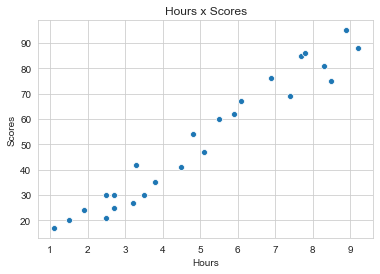

In [23]:
sns.set_style("whitegrid")
sns.scatterplot(x='Hours',y='Scores',data=data);
plt.title('Hours x Scores');

####  **Preparing of data so that we can use that data for the training and testing purposes.**

In [24]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Checking if there are any null values in the given dataset.


In [26]:
data.isnull().any()

Hours     False
Scores    False
dtype: bool

##### Since there are not any null values in the data set so we can continue towards our Analysis.
##### importing the train_test_split  so that we can divide the provided dataset into training and testing set by randomly classifying rows in training and testing set
Here below we are taking 20 % of data for testing from our dataset.

In [27]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

#### Training the Algorithm using our training dataset.
Importing LinearRegression from sklearn.linear_model

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
print("Training Successful")

Training Successful


#### Since the linear regression produces the linear relation between our X and y.
Hence Equation for straight line is y=mx + c
Therfore the value of m in the above equation can be calculated using model.coef_
and the value of c can be calculated using model.intercept_

In [29]:
model.coef_

array([9.91065648])

In [30]:
model.intercept_

2.018160041434683

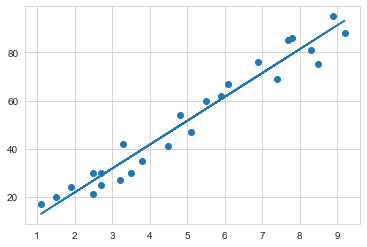

In [31]:
# Plotting the regression line
ln = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, ln);
plt.show()

#### Now we have trained our model, we will make the predictions now using our test data

In [32]:
print(X_test)     # our input testing values
y_prediction=model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [33]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_prediction})  
df 

,Actual Value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [34]:
hours=[[9.25]]    #manual input for hours
prediction=model.predict(hours)
print('If the student studies for',hours[0][0],'Hours then the student may score',prediction[0])

If the student studies for 9.25 Hours then the student may score 93.69173248737538


In [35]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
